In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv(r"data\Mall_Customers.csv",header=0,index_col=0,delimiter=None)

In [6]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [5]:
#here we created a count plot to see the difference in number of males and females

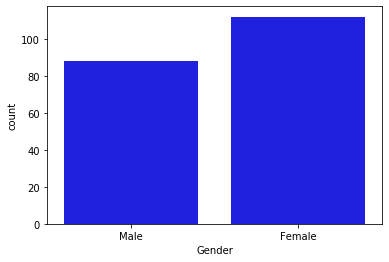

In [6]:
sns.countplot(x="Gender",data=df,hue=None,color="blue")

In [7]:
#we can also create piechart if we want ti see the differnce in percentage

In [8]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

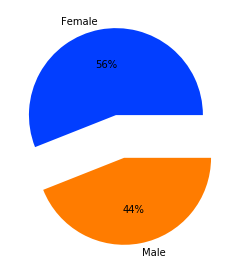

In [13]:
# importing libraries
import matplotlib.pyplot as plt

# declaring data
data = [112,88]
keys = ["Female","Male"]

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
explode = [0,0.5]

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%',explode=explode)

# displaying chart
plt.show()


In [14]:
colors = ['red', 'green']

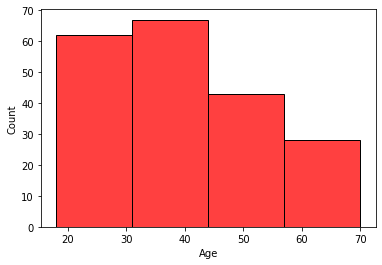

In [15]:
sns.histplot(data=df,x="Age",kde = False,bins=4,cbar=True,color="red")
plt.show()

In [16]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_core',
 '_decorators',
 '_docstrings',
 '_oldcore',
 '_orig_rc_params',
 '_statistics',
 '_stats',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load

In [17]:
sns.__version__

'0.12.2'

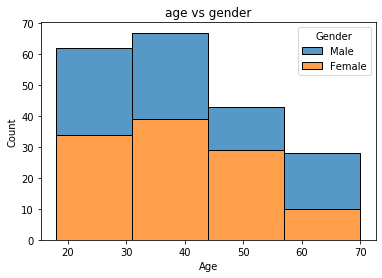

In [18]:
sns.histplot(data=df,x="Age",kde = False,multiple="stack",bins=4,cbar=True,color="green",hue="Gender")
plt.title("age vs gender")
plt.show()

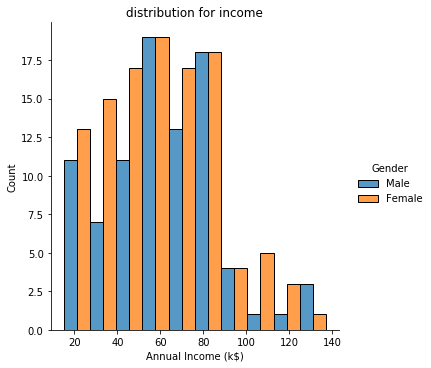

In [19]:
sns.displot(df,x="Annual Income (k$)",hue="Gender",multiple="dodge")
plt.title("distribution for income")
plt.show()

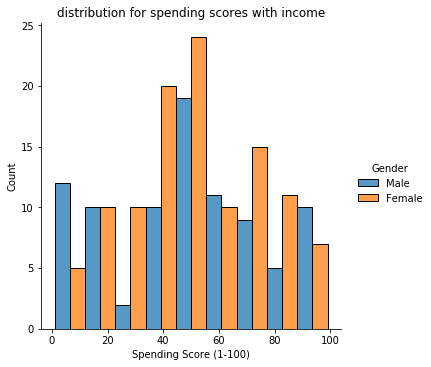

In [20]:
sns.displot(df,x="Spending Score (1-100)",hue="Gender",multiple="dodge")
plt.title("distribution for spending scores with income")
plt.show()

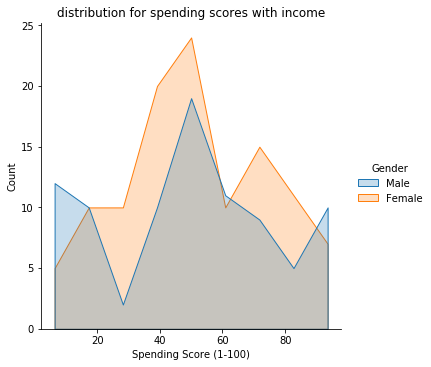

In [21]:
sns.displot(df,x="Spending Score (1-100)",hue="Gender",element="poly")
plt.title("distribution for spending scores with income")
plt.show()

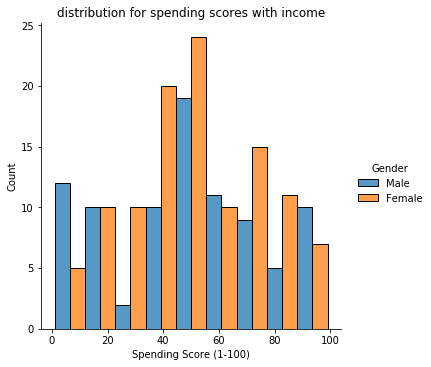

In [22]:
sns.displot(df,x="Spending Score (1-100)",hue="Gender",multiple="dodge")
plt.title("distribution for spending scores with income")
plt.show()

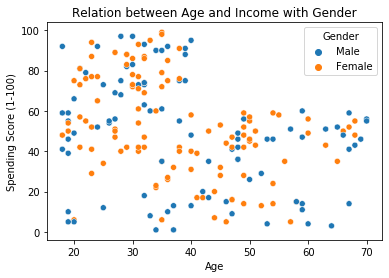

In [23]:
sns.scatterplot(data=df,x="Age",y="Spending Score (1-100)",hue="Gender")
plt.title("Relation between Age and Income with Gender")
plt.show()

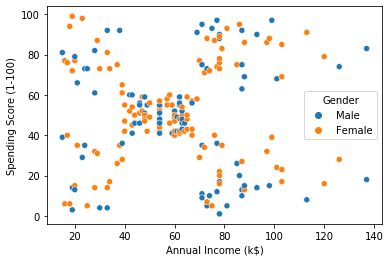

In [24]:
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)",hue="Gender")
plt.show()

# Step 4:Data processing

In [25]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.9+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [26]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


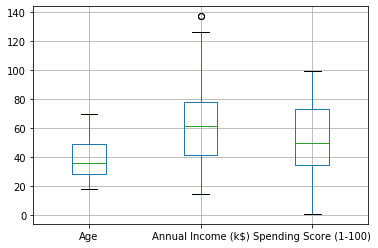

In [27]:
df.boxplot()
plt.show()


In [28]:
X=df.iloc[ : ,2:4]#[start_row:stop_row,start_col:stop_col]

In [29]:
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [30]:
%%time
#using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

K_MAX=15
wsse=[]
#progress bar
with tqdm(total=K_MAX-1) as pbar:
    for i in range (1,K_MAX):
        Kmeans=KMeans(n_clusters=i,random_state=10,n_jobs=-1)
        Kmeans.fit(X)
        wsse.append(Kmeans.inertia_)
        pbar.update(1)


Wall time: 58.6 s


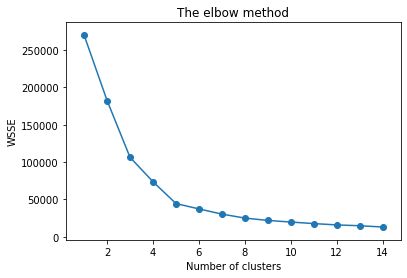

In [31]:
plt.plot(range(1,K_MAX),wsse)
plt.scatter(range(1,K_MAX),wsse) 
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [32]:
print(wsse[5])

37265.86520484347


In [33]:
Kmeans= KMeans(n_clusters=5,random_state=10)
Y_pred=Kmeans.fit_predict(X)

In [34]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [35]:
Kmeans.n_iter_

3

In [36]:
df["clusters"]=Y_pred
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2


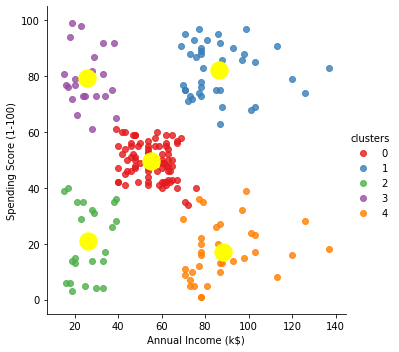

In [37]:
sns.lmplot(data=df,
          x='Annual Income (k$)',
          y='Spending Score (1-100)',
          fit_reg = False, #No regression Line
          hue = 'clusters',
          palette = "Set1")

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1],
           s = 300, c = 'yellow')
plt.show()

In [38]:
df["clusters"]=df.clusters.map({0:"careless",1:"Sensible",2:"Target",3:"NotUseful",4:"Careful"})

In [39]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,Target
2,Male,21,15,81,NotUseful
3,Female,20,16,6,Target
4,Female,23,16,77,NotUseful
5,Female,31,17,40,Target


In [40]:
df.to_csv(r"TargetCustomers.csv",index=True)